In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some helper functions
def plot_contag_table(data_count):
    names = data_count.columns
    for idx, row in data_count.iterrows():
        
        sum_ = row.sum()
        data_count.loc[idx,names[0]] = data_count.loc[idx,names[0]]/ sum_
        data_count.loc[idx,names[1]] = data_count.loc[idx,names[1]]/ sum_
    
    data_count.plot(kind='bar', figsize=(10, 5)) 
    plt.ylabel('Precentage')
    plt.grid()

    
def plot_conf_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data=conf_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])
    sns.heatmap(conf_matrix, annot=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Diwali photos/heart.csv')

In [ ]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [ ]:
print(f'train set shape: {df.shape}')

train set shape: (319795, 18)


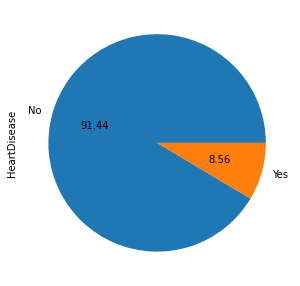

In [ ]:
num_classes = df['HeartDisease'].value_counts()
num_classes.plot(kind='pie', autopct='%.2f', figsize=(5, 5))

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


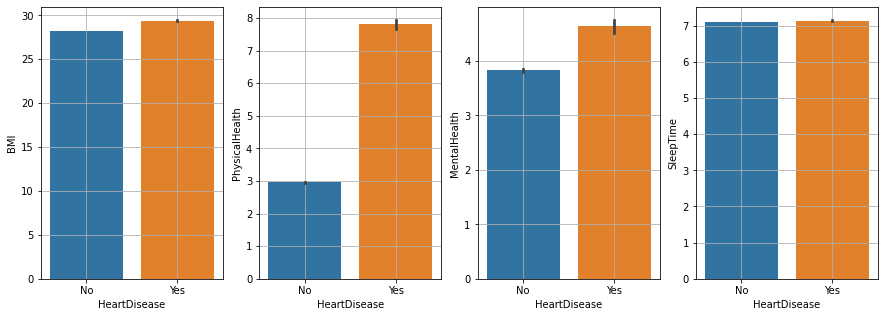

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.barplot(ax=axes[0], x="HeartDisease", y="BMI", data=df)
axes[0].grid()
sns.barplot(ax=axes[1], x="HeartDisease", y="PhysicalHealth", data=df)
axes[1].grid()
sns.barplot(ax=axes[2], x="HeartDisease", y="MentalHealth", data=df)
axes[2].grid()
sns.barplot(ax=axes[3], x="HeartDisease", y="SleepTime", data=df)
axes[3].grid()

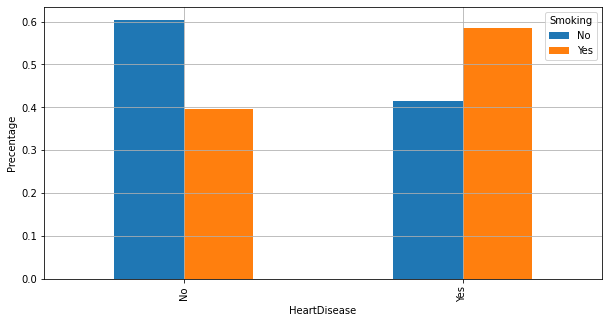

In [ ]:
data_count_smoke=df.groupby("HeartDisease")["Smoking"].value_counts().unstack()

plot_contag_table(data_count_smoke)

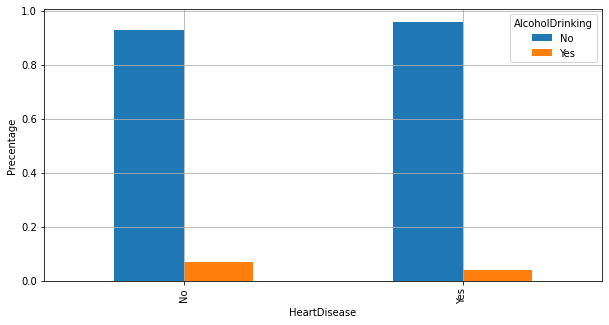

In [ ]:
data_count_alcohol=df.groupby("HeartDisease")["AlcoholDrinking"].value_counts().unstack()
plot_contag_table(data_count_alcohol)

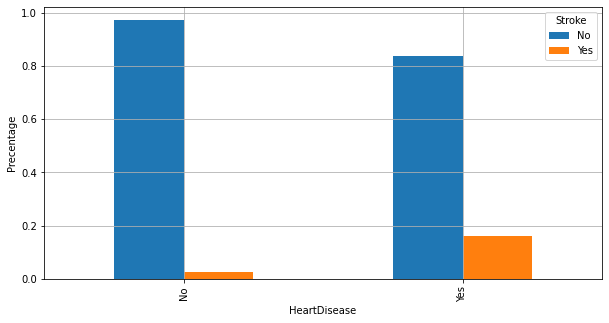

In [ ]:
data_count_stroke=df.groupby("HeartDisease")["Stroke"].value_counts().unstack()
plot_contag_table(data_count_stroke)

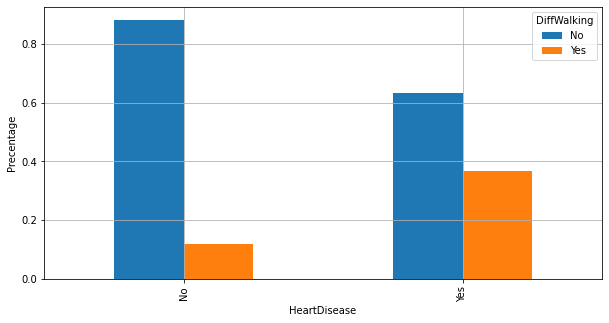

In [ ]:
data_count_DiffWalking=df.groupby("HeartDisease")["DiffWalking"].value_counts().unstack()
plot_contag_table(data_count_DiffWalking)

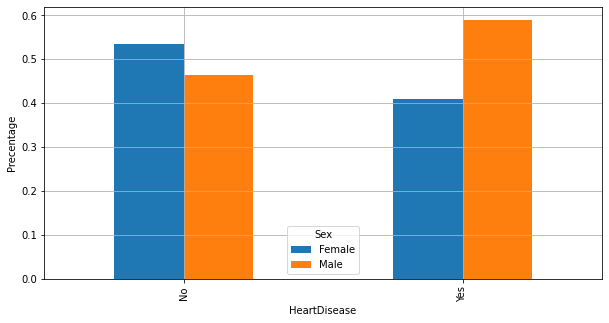

In [ ]:
data_count_Sex=df.groupby("HeartDisease")["Sex"].value_counts().unstack()
plot_contag_table(data_count_Sex)

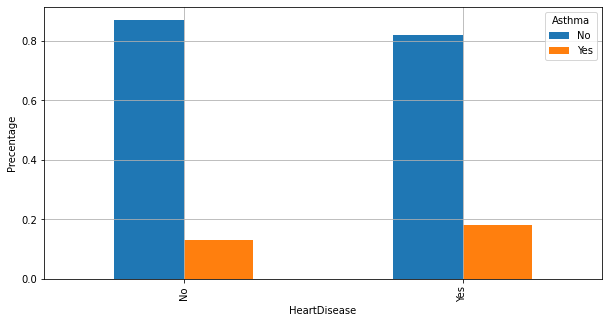

In [ ]:
data_count_Sex=df.groupby("HeartDisease")["Asthma"].value_counts().unstack()
plot_contag_table(data_count_Sex)


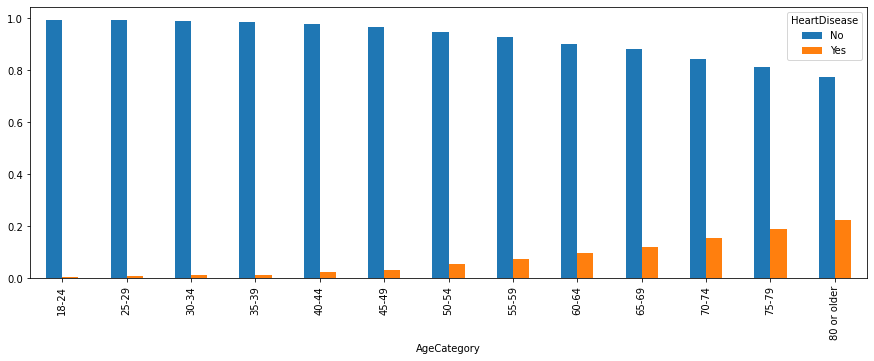

In [ ]:
data_count= df.groupby("HeartDisease")["AgeCategory"].value_counts().unstack()
data_count=data_count.T

for idx, row in data_count.iterrows():
    data_count.loc[idx,'No']
    sum_ = row.sum()
    data_count.loc[idx,'No'] = data_count.loc[idx,'No']/ sum_
    data_count.loc[idx,'Yes'] = data_count.loc[idx,'Yes']/ sum_

data_count.plot(kind='bar', figsize=(15, 5))   

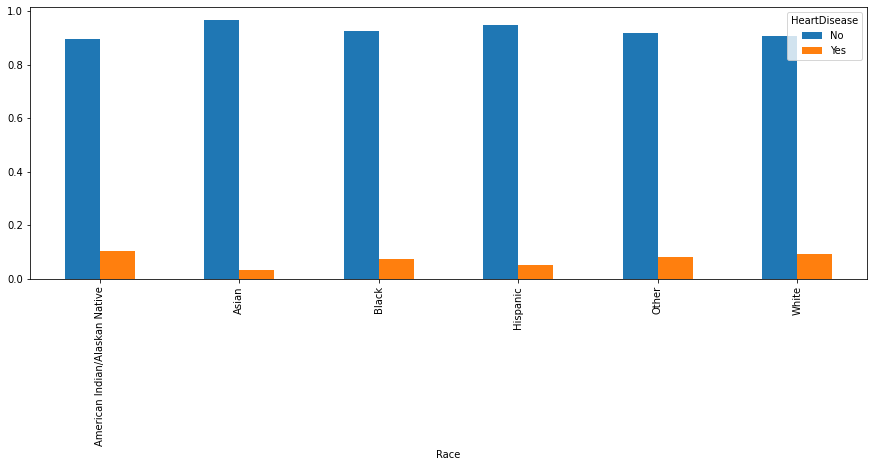

In [ ]:
data_count= df.groupby("HeartDisease")["Race"].value_counts().unstack()
data_count=data_count.T

for idx, row in data_count.iterrows():
    data_count.loc[idx,'No']
    sum_ = row.sum()
    data_count.loc[idx,'No'] = data_count.loc[idx,'No']/ sum_
    data_count.loc[idx,'Yes'] = data_count.loc[idx,'Yes']/ sum_
    
    
data_count.plot(kind='bar', figsize=(15, 5))  

In [ ]:
df['class'] = df['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)
df['class'] = df['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=44)

In [ ]:
features = data_train.columns

feature_num = [feature for i, feature in enumerate(features) if data_train.dtypes[i]=='float64']

feature_cat = [feature for i, feature in enumerate(features) if data_train.dtypes[i]=='object']
del feature_cat[0]

In [ ]:
ct = ColumnTransformer([("1hot", OneHotEncoder(), feature_cat),\
                       ("norm", StandardScaler(), feature_num)], remainder='passthrough')

ct.fit(data_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('1hot', OneHotEncoder(),
                                 ['Smoking', 'AlcoholDrinking', 'Stroke',
                                  'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                                  'Diabetic', 'PhysicalActivity', 'GenHealth',
                                  'Asthma', 'KidneyDisease', 'SkinCancer']),
                                ('norm', StandardScaler(),
                                 ['BMI', 'PhysicalHealth', 'MentalHealth',
                                  'SleepTime'])])

In [ ]:
x_train_1hot = ct.transform(data_train)[:,:-2]

y_train = data_train['class'].to_numpy()


x_test_1hot =  ct.transform(data_test)[:,:-2]
y_test = data_test['class'].to_numpy()

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB

In [ ]:
# x_trainign_true = x_test_1hot[filt,:].copy()
filt = y_train==True
x_lis = []
x_label = []
for i in range(3):
    x_lis.append(x_train_1hot[filt,:].copy())
    x_label.append(y_train[filt].copy())
    
x_trainign_true =np.concatenate(x_lis)
y_trainign_true =np.concatenate(x_label)

x_train_1hot_resample = np.concatenate([x_trainign_true,x_train_1hot])
y_train_resample = np.concatenate([y_trainign_true,y_train], axis=0)

idx = np.random.permutation(255836)

x_train_1hot_resample = x_train_1hot_resample[idx]
y_train_resample = y_train_resample[idx]

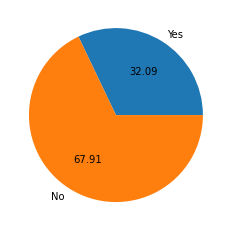

In [ ]:
num_classes = y_train_resample.sum()/y_train_resample.shape[0]
labels = ['Yes', 'No']
sizes = [num_classes*100, (1-num_classes)*100]
plt.pie(sizes,labels=labels, autopct='%.2f' )
plt.show()

accuracy_score:0.7213214715677231
f1_score:0.319850415935282


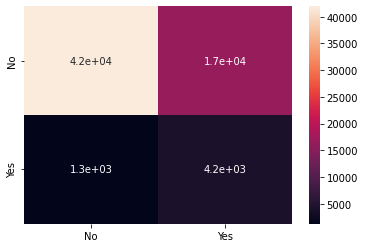

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train_1hot_resample, y_train_resample)

y_pred = gnb.predict(x_test_1hot)

plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

In [ ]:
parameters = {'max_depth':[8, 10, 12, 14, 16, 18, 20]}

clf = GridSearchCV(RandomForestClassifier(random_state=42), parameters, scoring='f1', cv=3)
clf = clf.fit(x_train_1hot_resample, y_train_resample)

y_pred = clf.best_estimator_.predict(x_test_1hot)

accuracy_score:0.8758110664644538
f1_score:0.3657270622055418


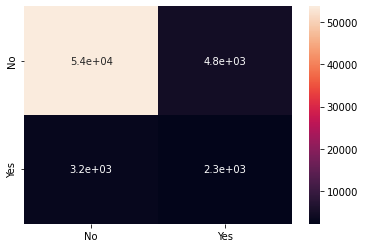

In [ ]:
plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

In [ ]:
def build_model(units=32):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units, activation='relu', kernel_regularizer='l2',input_shape=(50,)))
    model.add(tf.keras.layers.Dense(units, activation='relu', kernel_regularizer='l2'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), metrics=['accuracy'])
    return model

In [ ]:
y_train_resample=y_train_resample.astype(np.float32)
x_train_1hot_resample=x_train_1hot_resample.astype(np.float32)

model = build_model()
history=model.fit(x=x_train_1hot_resample, y=y_train_resample, epochs=100, batch_size=256)

Epoch 1/100
1000/1000 [==============================] - 3s 2ms/step - loss: 1.0367 - accuracy: 0.7128
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6986 - accuracy: 0.7648
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5735 - accuracy: 0.7719
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5264 - accuracy: 0.7741
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5073 - accuracy: 0.7749
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4981 - accuracy: 0.7752
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4925 - accuracy: 0.7757
Epoch 8/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4887 - accuracy: 0.7761
Epoch 9/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4858 - accuracy: 0.7762
Epoch 10/100
1000/1000 [==============================] - 2s 2ms/step - l

Text(0, 0.5, 'accuracy')

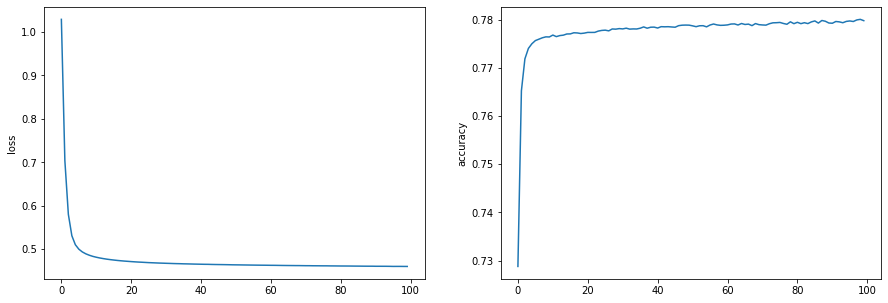

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(history.history['loss'])
axes[0].set_ylabel('loss')
axes[1].plot(history.history['accuracy'])
axes[1].set_ylabel('accuracy')

In [ ]:
x_test_1hot = x_test_1hot.astype(np.float32)
y_pred = model.predict(x_test_1hot)
y_pred = y_pred>.5

accuracy_score:0.8438218233555872
f1_score:0.39184170471841706


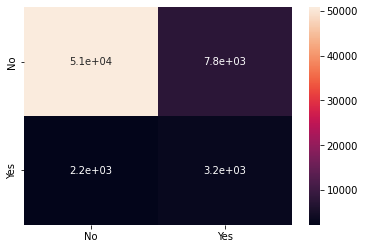

In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=conf_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])
sns.heatmap(conf_matrix, annot=True)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')